# Classify Documents

In [0]:
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load Data

In [0]:
!pip install -r /Workspace/Repos/jeanpierre.vanniekerk@truenorthgroup.co.za/document-analysis-using-gpt-3.ide/notebooks/requirements.txt

  Using cached azure_identity-1.6.0-py2.py3-none-any.whl (108 kB)
  Using cached streamlit-1.18.1-py2.py3-none-any.whl (9.6 MB)
  Using cached openai-0.27.8-py3-none-any.whl (73 kB)
  Using cached python_dotenv-0.21.0-py3-none-any.whl (18 kB)
  Using cached matplotlib-3.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached plotly-5.12.0-py2.py3-none-any.whl (15.2 MB)
  Using cached scipy-1.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached scikit_learn-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.5 MB)
  Using cached tiktoken-0.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached llama_index-0.4.33-py3-none-any.whl
  Using cached langchain-0.0.129-py3-none-any.whl (467 kB)
  Using cached faiss_cpu-1.7.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
  Using cached msal-1.23.0-py2.py3-none-any.whl (90 kB)
  Using cached msal_extensions-0.

In [0]:
import pandas as pd
df = spark.sql('select * from openai.document_analysis_embeddings').toPandas()

In [0]:
df[~df['embedding'].isnull()]["embedding"]

0       [-0.0013730002101510763, -0.03857267275452614,...
1       [-0.019999483600258827, -0.01637018285691738, ...
2       [-0.03645855933427811, -0.018086152151226997, ...
3       [-0.010294619016349316, -0.011219526641070843,...
4       [-0.00918667670339346, 0.002770294900983572, 0...
                              ...                        
2220    [-0.0173494815826416, -0.017017800360918045, -...
2221    [-0.008949771523475647, -0.034312888979911804,...
2222    [-0.011378474533557892, -0.0017791431164368987...
2223    [-0.009315110743045807, -0.004792795982211828,...
2224    [0.006188388913869858, -0.014487954787909985, ...
Name: embedding, Length: 2225, dtype: object

## Reduce dimensionality 
By
- TSNE ref: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE
- PCA ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [0]:
if False:
    from sklearn.manifold import TSNE

    # Create a t-SNE model and transform the data
    tsne = TSNE(n_components=3, perplexity=15, random_state=42, init='random', learning_rate=200)
    vis_dims_tsne = tsne.fit_transform(df['embedding'].to_list())
    vis_dims_tsne.shape

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims_pca = pca.fit_transform(df['embedding'].to_list())
vis_dims_pca.shape
vis_dims_pca

(2225, 3)

array([[ 0.0782017 , -0.10275473, -0.11558513],
       [ 0.01255544, -0.07276789, -0.12095111],
       [ 0.01729701, -0.12155121, -0.12281671],
       ...,
       [ 0.00885561, -0.05631997, -0.13451892],
       [ 0.0034633 , -0.10809072, -0.09752537],
       [ 0.06088647, -0.01060571, -0.11282603]])

In [0]:
df["vis_dims_pca"] = vis_dims_pca.tolist()
df

,category,filename,title,content,embedding,n_tokens,vis_dims_pca
0,entertainment,232.txt,Connick Jr to lead Broadway show,""" Singer and actor Harry Connick Jr is to star...","[-0.0013730002101510763, -0.03857267275452614,...",254,"[0.07820169522115768, -0.10275473087266479, -0..."
1,entertainment,233.txt,Elvis fans hold birthday bash,""" Elvis fans around the world have been markin...","[-0.019999483600258827, -0.01637018285691738, ...",230,"[0.012555436660866543, -0.07276788631659686, -..."
2,entertainment,234.txt,Elvis regains top chart position,Elvis Presley has scored his 19th number one ...,"[-0.03645855933427811, -0.018086152151226997, ...",383,"[0.017297011029813167, -0.12155121034458248, -..."
3,entertainment,235.txt,Pop band Busted to 'take a break',""" Chart-topping pop band Busted have confirmed...","[-0.010294619016349316, -0.011219526641070843,...",312,"[0.03619145582361269, -0.04574684522905185, -0..."
4,entertainment,236.txt,Franz Ferdinand's art school lesson,""" Scottish rock band Franz Ferdinand, who shot...","[-0.00918667670339346, 0.002770294900983572, 0...",694,"[0.05957987090112709, -0.07507796372840436, -0..."
...,...,...,...,...,...,...,...
2220,entertainment,227.txt,George Michael to perform for BBC,""" George Michael is to perform live at London'...","[-0.0173494815826416, -0.017017800360918045, -...",264,"[0.06604145192410958, -0.032348609156510166, -..."
2221,entertainment,228.txt,Joy Division story to become film,""" The life of late Joy Division singer Ian Cur...","[-0.008949771523475647, -0.034312888979911804,...",404,"[0.04740504284403718, -0.051808324394067004, -..."
2222,entertainment,229.txt,New York rockers top talent poll,""" New York electro-rock group The Bravery have...","[-0.011378474533557892, -0.0017791431164368987...",723,"[0.008855608792699303, -0.056319968970744545, ..."
2223,entertainment,230.txt,Aaliyah claim dismissed by court,Late R&B star Aaliyah's record company has fa...,"[-0.009315110743045807, -0.004792795982211828,...",236,"[0.0034633023337215067, -0.10809071591194049, ..."


## Visualise embeddings

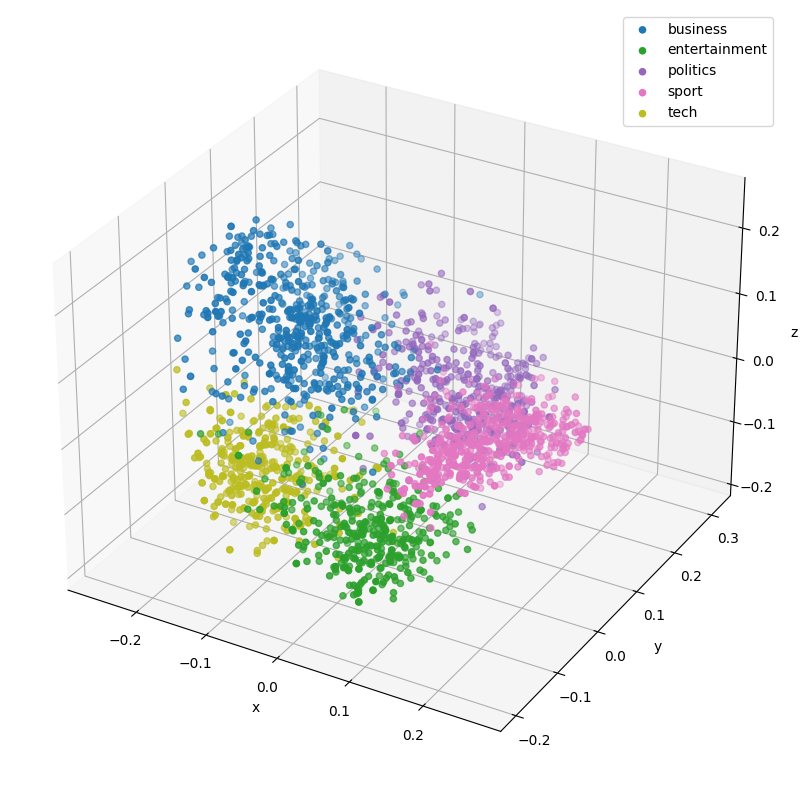

In [0]:
# %matplotlib widget InteractivePlot
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

categories = sorted(df['category'].unique())

# Plot each sample category individually
for i, cat in enumerate(categories):
    sub_matrix = np.array(df[df["category"] == cat]["vis_dims_pca"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    _ = ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')
_ = ax.set_zlabel('z')
_ = ax.legend()

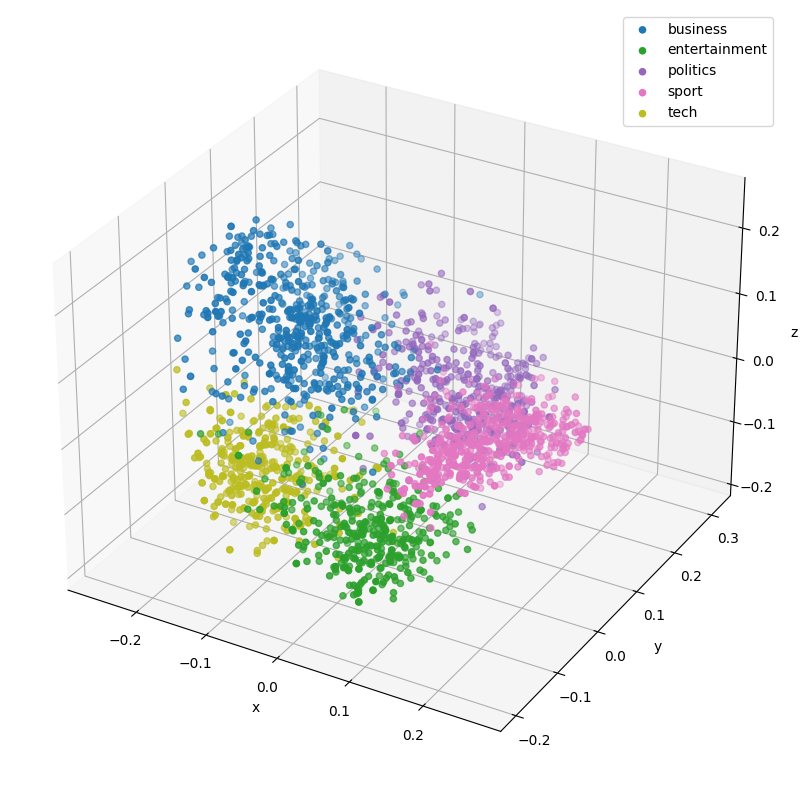

In [0]:
#%matplotlib widget
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

categories = sorted(df['category'].unique())

# Plot each sample category individually
for i, cat in enumerate(categories):
    sub_matrix = np.array(df[df["category"] == cat]["vis_dims_pca"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    _ = ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')
_ = ax.set_zlabel('z')
_ = ax.legend()